In [1]:
import sjldpm
from sjldpm.apps.cond.try_cond_1 import *
import importlib
importlib.reload(sjldpm.apps.cond.try_cond_1)

import matplotlib.pyplot as plt

import matplotlib.image as mpimg

2024-11-25 09:55:40.532619: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcudart.so.12
Using TensorFlow backend.


In [2]:
from sjldpm.apps.reference.ddpm2_h import imread,list_pictures

In [3]:
def show_image(path):
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

def show_image2(path1,path2):
    img1 = mpimg.imread(path1)
    img2 = mpimg.imread(path2)
    fig,axes= plt.subplots(1,2)
    axes[0].imshow(img1)
    axes[1].imshow(img2)
    plt.show()

def to_displayable_img(img):
    return cv2.cvtColor( (img/2+0.5).astype(np.float32), cv2.COLOR_BGR2RGB)


In [4]:
gpuid = 3
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpuid}"
log_dir = use_log_dir(sjldpm,cfn,"loadPretrained",0)
# ------------------

config  = get_config()
print(" Create model ...")
model = call_by_inspect( get_model, config)
print(" ... Load weights ...")
path_ckpt = Path("/home/yumeng/workspace/DDPM-SuJL/Results-old/ddpm2__v2/version_1/weights/model.weights").as_posix()
model.load_weights(path_ckpt)

 Create model ...



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 128)       128000      input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 128 3456        input_1[0][0]                    
____________________________________________________________________________________________

2024-11-25 09:55:54.227469: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcuda.so.1
2024-11-25 09:55:54.260854: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1674] Found device 0 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:af:00.0
2024-11-25 09:55:54.260916: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcudart.so.12
2024-11-25 09:55:54.444582: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcublas.so.12
2024-11-25 09:55:54.461070: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcufft.so.11
2024-11-25 09:55:54.465394: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcurand.so.10
2024-11-25 09:55:54.527156: I tensorflow/stream_executor/platfor

In [5]:
path_uncond = Path(log_dir,"uncond.png").as_posix()
path_uncond_ddim = Path(log_dir,"uncond_ddim.png").as_posix()
path_cond_mk1_ddim = Path(log_dir,"cond_mk1_ddim.png").as_posix()
path_cond2_mk1_ddim = Path(log_dir,"cond2_mk1_ddim.png").as_posix()



def ddim_suffix(path, stride,eta):
    return Path(Path(path).parent,Path(path).stem + f"stride_{stride}_eta_{eta}"+Path(path).suffix).as_posix()

In [6]:

# sample(model,path_uncond,4,None,0,img_size=config["img_size"], beta=config["beta"], bar_beta=config["bar_beta"], alpha=config["alpha"], sigma=config["sigma"], T=config["T"])


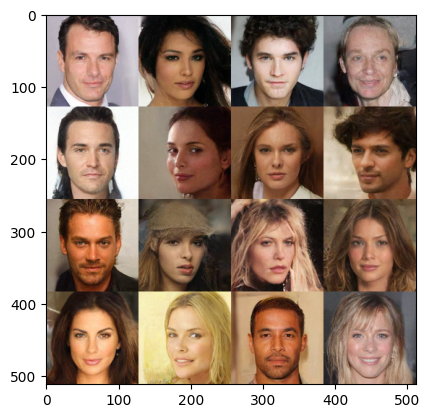

In [7]:
show_image(path_uncond)

  0% 0/10 [00:00<?, ?it/s]

2024-11-25 09:56:01.985484: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcublas.so.12
2024-11-25 09:56:03.670942: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcudnn.so.8
100% 10/10 [00:13<00:00,  1.32s/it]


Imwrite ...



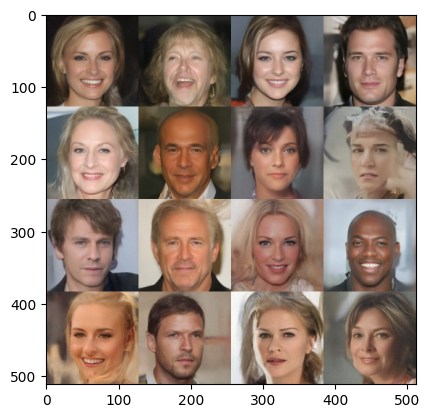

In [8]:

sample_ddim(model,path_uncond_ddim,4,None,stride=100,eta=0,img_size=config["img_size"],bar_alpha=config["bar_alpha"])
show_image(path_uncond_ddim) # good and fast!

/home/yumeng/workspace/DDPM-SuJL/sjldpm/apps/cond/29000-dataset.jpg
cond_img2: (128, 128, 3) <class 'numpy.ndarray'> -0.8980392 1.0


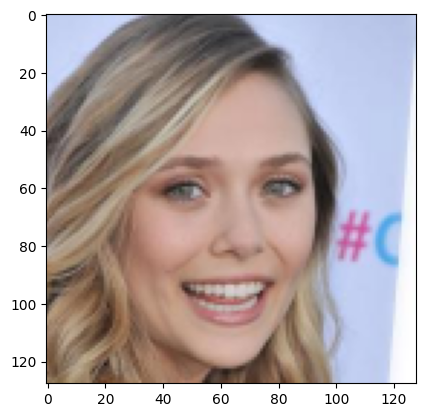

In [9]:
cfp = Path(sjldpm.apps.cond.try_cond_1.__file__).parent
path_cond_img2 = Path(cfp,"29000-dataset.jpg").as_posix()
print(path_cond_img2 )
cond_img2 = imread(path_cond_img2, (128,128))
print("cond_img2:", cond_img2.shape, type(cond_img2),cond_img2.min(),cond_img2.max())
plt.imshow(cv2.cvtColor(cond_img2/2+0.5, cv2.COLOR_BGR2RGB))
plt.show()

/home/yumeng/workspace/DDPM-SuJL/sjldpm/apps/cond/Human Faces Generated by AI - Microstock Posts.jpg
cond_img: (128, 128, 3) <class 'numpy.ndarray'> -0.9529412 0.9764706


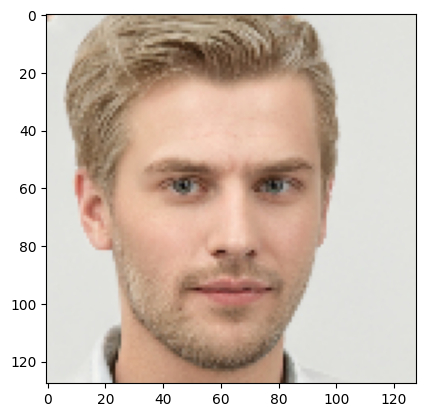

In [10]:
cfp = Path(sjldpm.apps.cond.try_cond_1.__file__).parent
path_cond_img = Path(cfp,"Human Faces Generated by AI - Microstock Posts.jpg").as_posix()
print(path_cond_img )
cond_img = imread(path_cond_img, (128,128))
print("cond_img:", cond_img.shape, type(cond_img),cond_img.min(),cond_img.max())
plt.imshow(cv2.cvtColor(cond_img/2+0.5, cv2.COLOR_BGR2RGB))
plt.show()

## Brute way: $Xt = Xt + c* (Yt - Xt)$

In [11]:
def sample_ddim_cond_mk1(model,path=None, n=4, z_samples=None, stride=1, eta=1,*,img_size,bar_alpha,cond_img,cond_weight):
    T = len(bar_alpha)
    def f(z_samples,bt,bar_beta):
        m = cond_img
        c = cond_weight
        t = int(float(bt[0,0])/stride)
        m_noised = np.sqrt(1- bar_beta[t] **2) * m + np.random.randn(*z_samples.shape) * bar_beta[t]
        z_samples
        return z_samples + c* (m_noised - z_samples)
    return core_sample_ddim(model,path,n,z_samples,stride,eta,img_size = img_size,bar_alpha=bar_alpha,cond_fn=f)

In [12]:
def demo_mk1(title, cond_img, cond_weight, stride,eta,path_save):
    grid= sample_ddim_cond_mk1(model,ddim_suffix(path_save,stride,eta),4,None,stride=stride,eta=eta,
            img_size=config["img_size"],
            bar_alpha=config["bar_alpha"],
            cond_img = cond_img,
            cond_weight=cond_weight)
    print(title)
    fig,axes = plt.subplots(1,2)
    axes[0].imshow(to_displayable_img(cond_img))
    axes[1].imshow(to_displayable_img(grid))
    plt.show()



100% 40/40 [00:12<00:00,  3.19it/s]


Imwrite ...

External image as condition


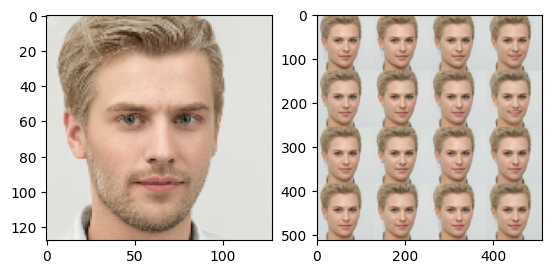

In [13]:
demo_mk1("External image as condition",cond_img,0.1,25,1,Path(log_dir,"cond_mk1_img1_c0.1.png"))

  0% 0/10 [00:00<?, ?it/s]

100% 10/10 [00:03<00:00,  3.14it/s]


Imwrite ...

External image as condition


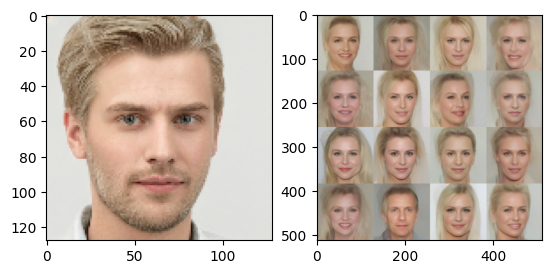

In [14]:
demo_mk1("External image as condition",cond_img,0.1,100,1,Path(log_dir,"cond_mk1_img1_c0.1.png"))

  0% 0/40 [00:00<?, ?it/s]

100% 40/40 [00:12<00:00,  3.16it/s]


Imwrite ...

Internal image as condition


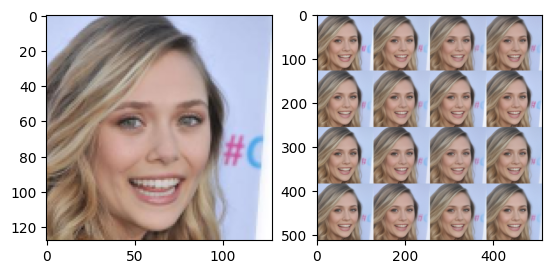

In [15]:
demo_mk1("Internal image as condition",cond_img2,0.1,25,1,Path(log_dir,"cond_mk1_img3_c0.1.png"))

  0% 0/40 [00:00<?, ?it/s]

100% 40/40 [00:12<00:00,  3.18it/s]


Imwrite ...

Internal image as condition


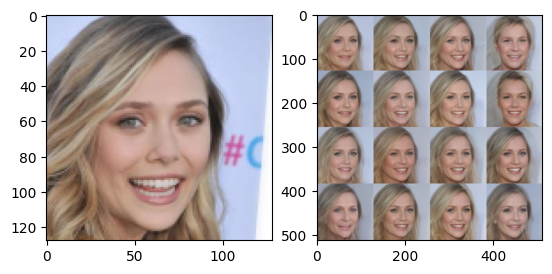

In [16]:
demo_mk1("Internal image as condition",cond_img2,0.05,25,1,Path(log_dir,"cond_mk1_img3_c0.05.png"))

## Brute way 2.0: Pixel-downsampled image $P(Xt)= P(Xt) - c * (P(Yt) - P(Xt)) $ 

[[0.19733798 0.84902147 0.68361416 ... 0.57965782 0.75158822 0.23085186]
 [0.57374428 0.22092893 0.40931687 ... 0.80307381 0.5302325  0.31523951]
 [0.39702995 0.12105648 0.75268473 ... 0.38363439 0.21833018 0.25852719]
 ...
 [0.1163352  0.23983751 0.02134579 ... 0.51597142 0.05306297 0.78292026]
 [0.65278757 0.43580932 0.9927069  ... 0.94020976 0.26644879 0.69738532]
 [0.2663081  0.9272326  0.16909087 ... 0.29422788 0.4499291  0.49866098]]
[[0. 1. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]
drop_rate= 0.496826171875


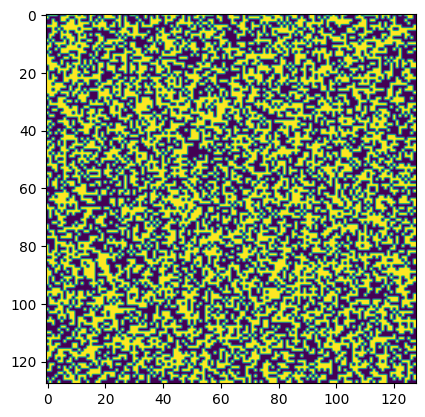

In [17]:
_msk = np.random.rand(128,128)
print(_msk)
mask_pixel = np.ones((128,128))
mask_pixel[_msk<0.5] = 0
print(mask_pixel)
rate = 1- mask_pixel.sum()/mask_pixel.size
print("drop_rate=",rate)

plt.imshow(mask_pixel)
plt.show()


In [18]:
def sample_ddim_cond_mk2(model,path=None, n=4, z_samples=None, stride=1, eta=1,*,img_size,bar_alpha,cond_img,cond_weight,mask_pixel):
    """
    mask_pixel: (H,W)
    """
    
    T = len(bar_alpha)
    def f(z_samples,bt,bar_beta):
        msk= mask_pixel.reshape(1,*(mask_pixel.shape),1) * np.ones_like(z_samples)
        m = cond_img
        c = cond_weight
        t = int(float(bt[0,0])/stride)
        m_noised = np.sqrt(1- bar_beta[t] **2) * m + np.random.randn(*z_samples.shape) * bar_beta[t]
        new_z = z_samples + c* (m_noised - z_samples)
        #print(" - debug: z_samples.shape",z_samples.shape)
        #print(" - debug: msk.shape",msk.shape)
        
        z_samples[msk>0.5] = new_z[msk>0.5] 
        return z_samples 
    return core_sample_ddim(model,path,n,z_samples,stride,eta,img_size = img_size,bar_alpha=bar_alpha,cond_fn=f)

In [19]:
def demo_mk2(title,cond_img,mask_pixel,cond_weight,stride,eta,path_save):
    print(title)
    print("Stride:",stride,"Eta:",eta)
    cond_img_masked= cond_img * mask_pixel.reshape(*mask_pixel.shape,1)
    print("- debug", cond_img_masked.shape,cond_img_masked.min(),cond_img_masked.max() )
    plt.imshow(cv2.cvtColor( (cond_img_masked/2+0.5).astype(np.float32), cv2.COLOR_BGR2RGB))

    p= ddim_suffix(path_save,stride,eta)
    grid= sample_ddim_cond_mk2(model,p,4,None,stride=stride,eta=eta,
            img_size=config["img_size"],
            bar_alpha=config["bar_alpha"],
            cond_img = cond_img,
            cond_weight=cond_weight,
            mask_pixel=mask_pixel)
    fig,axes = plt.subplots(1,2)
    axes[0].imshow(to_displayable_img(cond_img))
    axes[1].imshow(to_displayable_img(grid))
    plt.show()

External image as condition
Stride: 100 Eta: 1
- debug (128, 128, 3) -0.9372549057006836 0.9764705896377563


100% 10/10 [00:03<00:00,  3.03it/s]


Imwrite ...



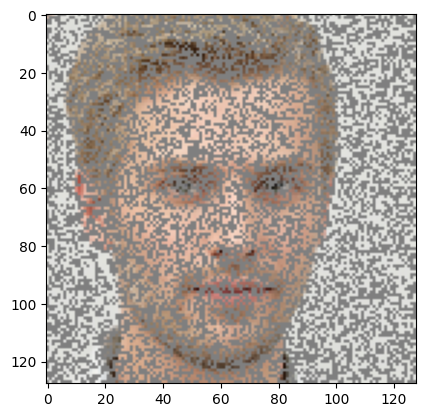

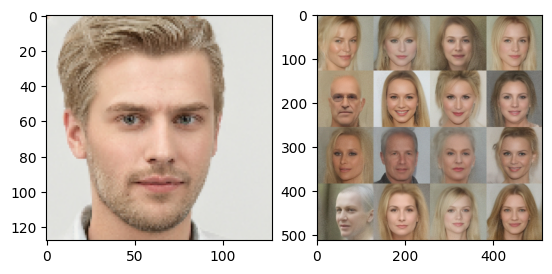

In [20]:
demo_mk2("External image as condition",cond_img,mask_pixel,0.1,100,1,Path(log_dir,"cond_mk2_1.png"))

External image as condition
Stride: 25 Eta: 1
- debug (128, 128, 3) -0.9372549057006836 0.9764705896377563


  0% 0/40 [00:00<?, ?it/s]

100% 40/40 [00:13<00:00,  3.05it/s]


Imwrite ...



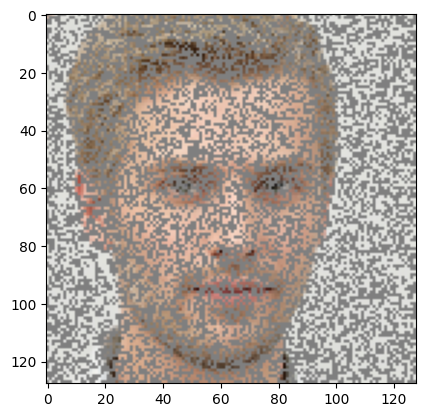

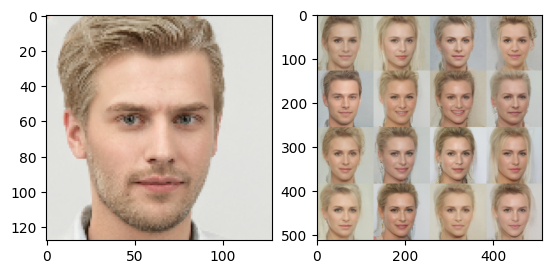

In [21]:
demo_mk2("External image as condition",cond_img,mask_pixel,0.1,25,1,Path(log_dir,"cond_mk2_1.png"))

External image as condition
Stride: 20 Eta: 1
- debug (128, 128, 3) -0.9372549057006836 0.9764705896377563


  0% 0/50 [00:00<?, ?it/s]

100% 50/50 [00:16<00:00,  3.04it/s]


Imwrite ...



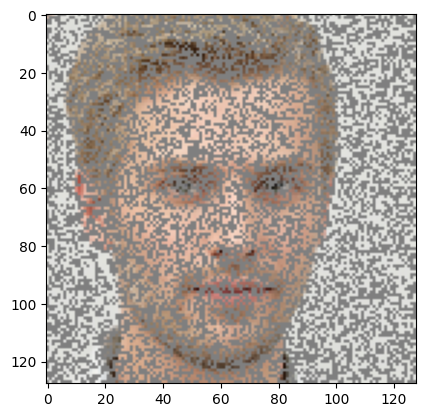

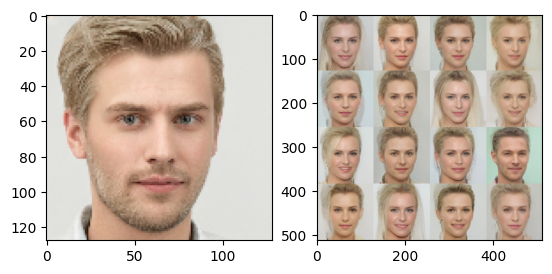

In [22]:
demo_mk2("External image as condition",cond_img,mask_pixel,0.1,20,1,Path(log_dir,"cond_mk2_1.png"))

Internal image as condition
Stride: 100 Eta: 1
- debug (128, 128, 3) -0.8352941274642944 1.0


  0% 0/10 [00:00<?, ?it/s]

100% 10/10 [00:03<00:00,  3.06it/s]


Imwrite ...



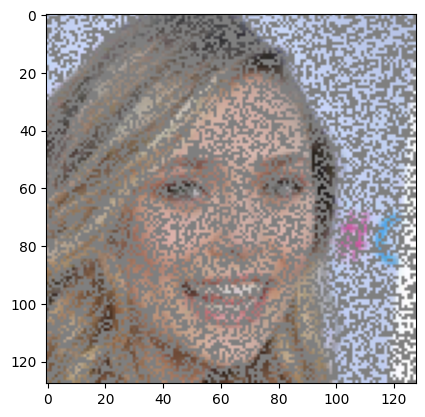

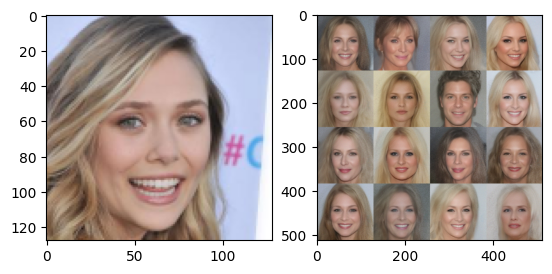

In [23]:
demo_mk2("Internal image as condition",cond_img2,mask_pixel,0.1,100,1,Path(log_dir,"cond_mk2_2.png"))

Internal image as condition
Stride: 25 Eta: 1
- debug (128, 128, 3) -0.8352941274642944 1.0


  0% 0/40 [00:00<?, ?it/s]

100% 40/40 [00:13<00:00,  3.03it/s]


Imwrite ...



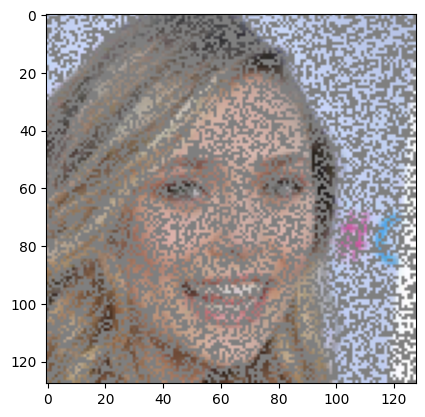

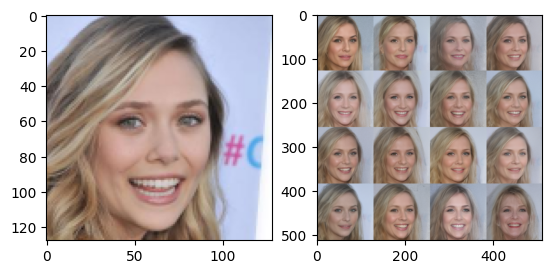

In [24]:
demo_mk2("Internal image as condition",cond_img2,mask_pixel,0.1,25,1,Path(log_dir,"cond_mk2_2.png"))

Internal image as condition
Stride: 20 Eta: 1
- debug (128, 128, 3) -0.8352941274642944 1.0


  0% 0/50 [00:00<?, ?it/s]

100% 50/50 [00:16<00:00,  3.04it/s]


Imwrite ...



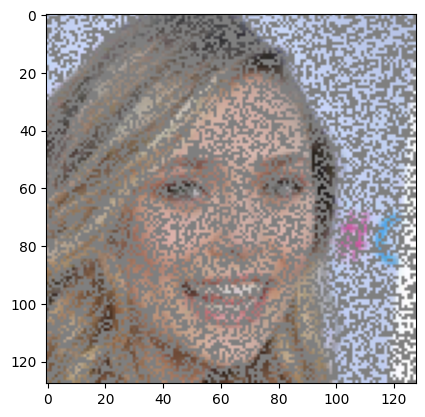

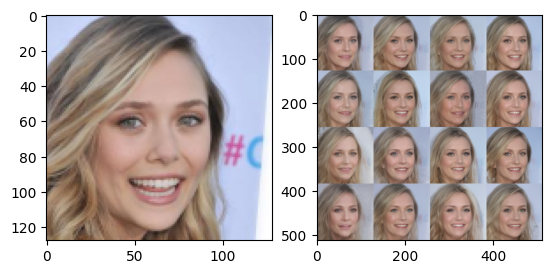

In [25]:
demo_mk2("Internal image as condition",cond_img2,mask_pixel,0.1,20,1,Path(log_dir,"cond_mk2_2.png"))

## In Fourier space, 

[[0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 1. 1. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]]
drop_rate= 0.489990234375
x: (128, 128, 3) -0.9529412 0.9764706
Fx: 1.7881393432617188e-07 223.49804878234863
err(x-ifft(fft(x))): 1.688052475579127e-12
msk: 0.0 1.0
(128, 128, 3)
IFx: (128, 128, 3) -0.8801749584402407 1.1241661607597089


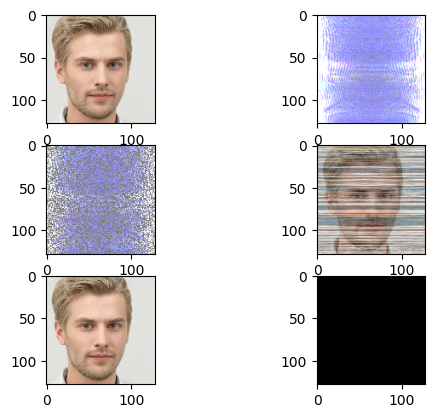

In [26]:
_msk = np.random.rand(128,128) 
mask_pixel = np.ones((128,128))
mask_pixel[_msk<0.5] = 0
print(mask_pixel)
rate = 1- mask_pixel.sum()/mask_pixel.size
print("drop_rate=",rate)


x = cond_img
print("x:",x.shape,x.min(),x.max())
Fx = np.fft.fft2(x,axes=[1,2])
IFx = np.fft.ifft2(Fx,axes=[1,2]).real
err  = abs(x-IFx).sum()

print("Fx:",abs(Fx).min(),abs(Fx).max())
print("err(x-ifft(fft(x))):",err)
msk = mask_pixel.reshape(*(mask_pixel.shape),1) * np.ones_like(x)
print("msk:",msk.min(),msk.max())
Fx_masked = Fx * msk
print(Fx_masked.shape)
IFx_masked= np.fft.ifft2(Fx_masked,axes=[1,2]).real
print("IFx:",IFx.shape,IFx_masked.min(),IFx_masked.max())

fig,axes = plt.subplots(3,2)
axes[0][0].imshow(to_displayable_img(x))
axes[0][1].imshow(to_displayable_img(abs(Fx)))
axes[1][0].imshow(to_displayable_img(abs(Fx_masked)))
axes[1][1].imshow(to_displayable_img(IFx_masked))
axes[2][0].imshow(to_displayable_img(IFx))
axes[2][1].imshow(np.zeros_like(x))
plt.show()

In [27]:
x = cond_img
y = cond_img
Fz = np.fft.fft2(x-y)
IFz = np.fft.ifft2(Fz)
z2 = np.fft.ifft2(np.fft.fft2(x) - np.fft.fft2(y))
err = abs(z2-IFz).sum()
print(err)

0.0


In [28]:
def sample_ddim_cond_mk3(model,path=None, n=4, z_samples=None, stride=1, eta=1,*,img_size,bar_alpha,cond_img,cond_weight,mask_pixel):
    """
    mask_pixel: (H,W)
    """
    
    T = len(bar_alpha)
    def f(z_samples,bt,bar_beta):
        msk= mask_pixel.reshape(1,*(mask_pixel.shape),1) * np.ones_like(z_samples)
        m = cond_img
        c = cond_weight
        t = int(float(bt[0,0])/stride)
        m_noised = np.sqrt(1- bar_beta[t] **2) * m + np.random.randn(*z_samples.shape) * bar_beta[t]
        Fm = np.fft.fft2(m_noised,axes=[2,3])
        Fz = np.fft.fft2(z_samples,axes=[2,3])
        new_Fz = (1-c) * Fz + c* Fm 
        Fz[msk>0.5] = new_Fz[msk>0.5] 
        return np.fft.ifft2(Fz,axes=[2,3]).real
    return core_sample_ddim(model,path,n,z_samples,stride,eta,img_size = img_size,bar_alpha=bar_alpha,cond_fn=f)

In [29]:
def demo_mk3(title,cond_img,mask_pixel,cond_weight,stride,eta,path_save):
    print(title)
    print("Stride:",stride,"Eta:",eta)
    x= cond_img
    msk = mask_pixel.reshape(*mask_pixel.shape,1)* np.ones_like(x)
    Fx = np.fft.fft2(x,axes=[1,2])
    

    Fx_masked = Fx * msk
    IFx_masked= np.fft.ifft2(Fx_masked,axes=[1,2]).real
    
    fig,axes = plt.subplots(2,2)
    axes[0][0].imshow(to_displayable_img(x))
    axes[0][1].imshow(to_displayable_img(abs(Fx)))
    axes[1][0].imshow(to_displayable_img(abs(Fx_masked)))
    axes[1][1].imshow(to_displayable_img(IFx_masked))
    plt.show()

    p= ddim_suffix(path_save,stride,eta)
    grid= sample_ddim_cond_mk3(model,p,4,None,stride=stride,eta=eta,
            img_size=config["img_size"],
            bar_alpha=config["bar_alpha"],
            cond_img = cond_img,
            cond_weight=cond_weight,
            mask_pixel=mask_pixel)
    fig,axes = plt.subplots(1,2)
    axes[0].imshow(to_displayable_img(cond_img))
    axes[1].imshow(to_displayable_img(grid))
    plt.show()

Internal image as condition
Stride: 25 Eta: 1


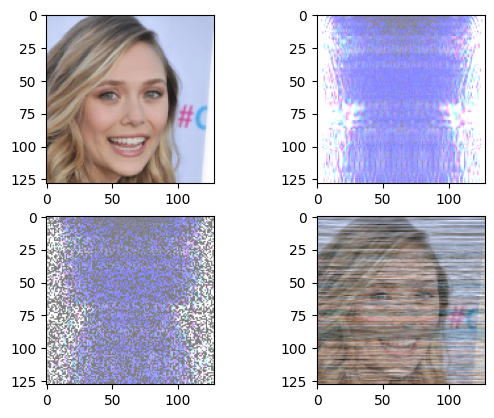

100% 40/40 [00:20<00:00,  1.95it/s]


Imwrite ...



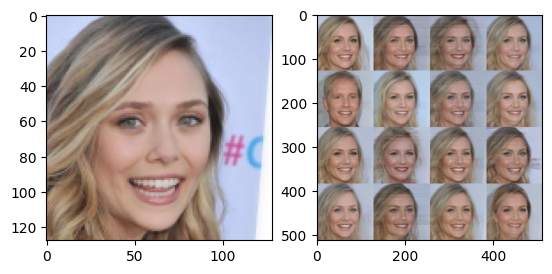

In [30]:
demo_mk3("Internal image as condition",cond_img2,mask_pixel,0.1,25,1,Path(log_dir,"cond_mk3_2_c0.1.png"))

Internal image as condition
Stride: 25 Eta: 1


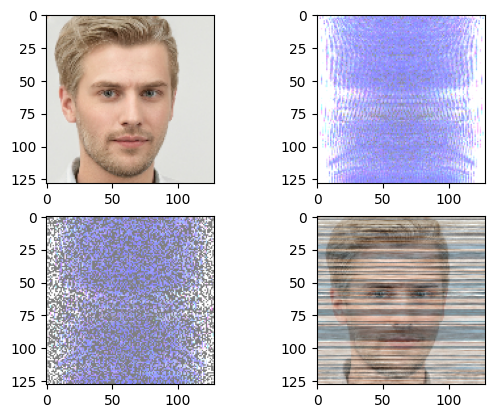

100% 40/40 [00:18<00:00,  2.20it/s]


Imwrite ...



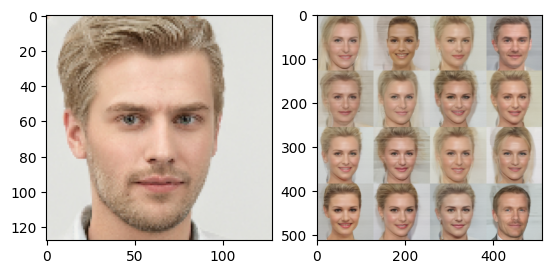

In [31]:
demo_mk3("Internal image as condition",cond_img,mask_pixel,0.1,25,1,Path(log_dir,"cond_mk3_1_c0.1.png"))

Internal image as condition
Stride: 50 Eta: 1


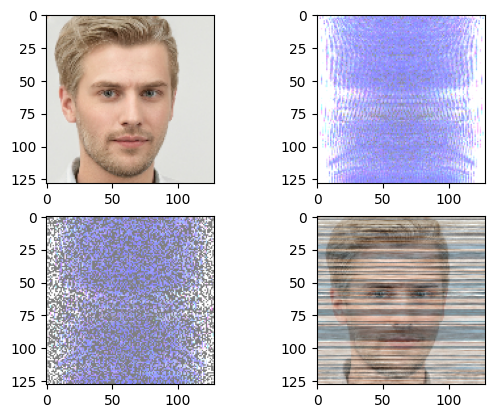

  5% 1/20 [00:00<00:08,  2.26it/s]

100% 20/20 [00:08<00:00,  2.30it/s]


Imwrite ...



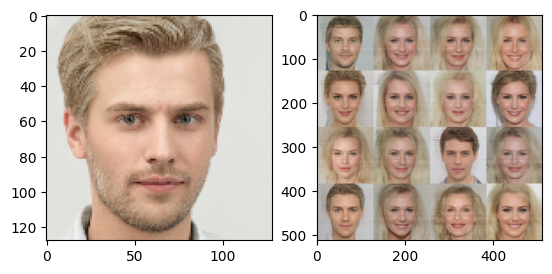

In [32]:
demo_mk3("Internal image as condition",cond_img,mask_pixel,0.1,50,1,Path(log_dir,"cond_mk3_1_c0.1.png"))

Internal image as condition
Stride: 100 Eta: 1


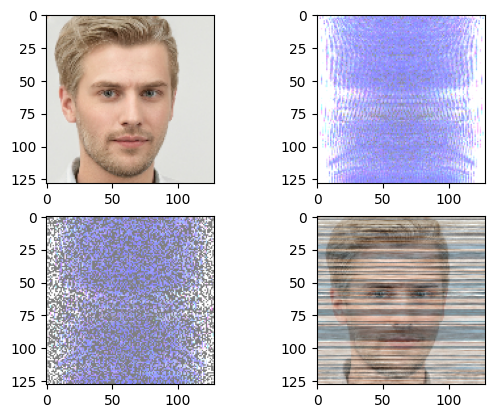

100% 10/10 [00:04<00:00,  2.04it/s]


Imwrite ...



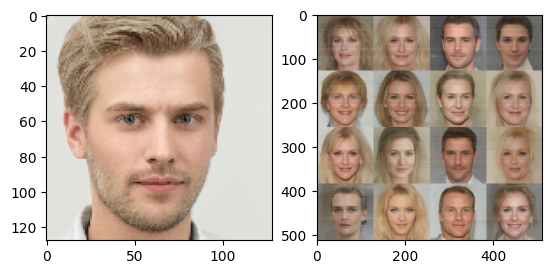

In [33]:
demo_mk3("Internal image as condition",cond_img,mask_pixel,0.1,100,1,Path(log_dir,"cond_mk3_1_c0.1.png"))